<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

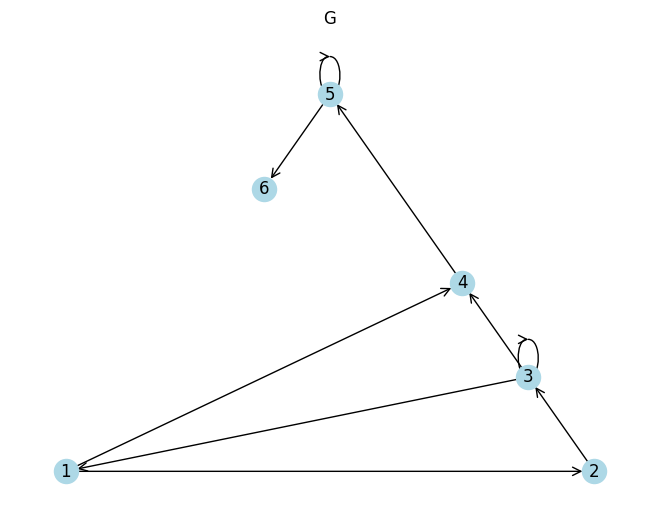

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# ایجاد گراف جهت‌دار
G = nx.DiGraph()

# رئوس
vertices = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(vertices)

# یال‌ها
edges = [
    (1, 2), (2, 3), (3, 1),
    (1, 4), (4, 5), (5, 6),(5,5),(3,3),
    (3, 4)
]
G.add_edges_from(edges)

# رسم گراف
pos = nx.planar_layout(G)  # چینش مسطح
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        arrows=True, arrowstyle='->', arrowsize=15)
plt.title("G")
plt.show()

In [40]:
import numpy as np


adj_matrix = np.zeros((6, 6), dtype=int)

# پر کردن ماتریس بر اساس یال‌ها
for (u, v) in edges:
    adj_matrix[u-1][v-1] = 1

# نمایش ماتریس
print("ماتریس مجاورت گراف:")
print(adj_matrix)

ماتریس مجاورت گراف:
[[0 1 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 1 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]]


In [41]:

# محاسبه درجه خروجی هر راس
out_degree = {v: 0 for v in vertices}
for (u, v) in edges:
    out_degree[u] += 1

# ایجاد ماتریس انتقال (۶x۶)
P = np.zeros((6, 6))

# پر کردن ماتریس انتقال
for (u, v) in edges:
    P[u-1][v-1] = 1 / out_degree[u]  # چون پایتون ایندکس از ۰ شروع می‌شود

# نمایش ماتریس انتقال
print("ماتریس انتقال (P):")
print(P)

ماتریس انتقال (P):
[[0.         0.5        0.         0.5        0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.         0.         0.        ]]


In [42]:
import numpy as np


alpha = 0.85
n = 6


# ماتریس اتصال یکنواخت (Teleportation)
teleport = np.ones((n, n)) / n

# محاسبه ماتریس Pα
P_alpha = alpha * P + (1 - alpha) * teleport

# نمایش ماتریس Pα
print(f"ماتریس انتقال پیج رنک (P_alpha) با آلفا = {alpha}:")
print(np.round(P_alpha, 4))

ماتریس انتقال پیج رنک (P_alpha) با آلفا = 0.85:
[[0.025  0.45   0.025  0.45   0.025  0.025 ]
 [0.025  0.025  0.875  0.025  0.025  0.025 ]
 [0.3083 0.025  0.3083 0.3083 0.025  0.025 ]
 [0.025  0.025  0.025  0.025  0.875  0.025 ]
 [0.025  0.025  0.025  0.025  0.45   0.45  ]
 [0.025  0.025  0.025  0.025  0.025  0.025 ]]


In [43]:
alpha = float(input("مقدار آلفا را وارد کنید (مثلا 0.85): "))

n = 6



P_alpha = alpha * P + (1 - alpha) * np.ones((n, n)) / n
print(f"P_alpha با آلفا = {alpha}:\n", np.round(P_alpha, 4))

مقدار آلفا را وارد کنید (مثلا 0.85): 0.85
P_alpha با آلفا = 0.85:
 [[0.025  0.45   0.025  0.45   0.025  0.025 ]
 [0.025  0.025  0.875  0.025  0.025  0.025 ]
 [0.3083 0.025  0.3083 0.3083 0.025  0.025 ]
 [0.025  0.025  0.025  0.025  0.875  0.025 ]
 [0.025  0.025  0.025  0.025  0.45   0.45  ]
 [0.025  0.025  0.025  0.025  0.025  0.025 ]]


In [44]:


# محاسبه مقادیر ویژه و بردارهای ویژه
eigenvalues, eigenvectors = np.linalg.eig(P_alpha.T)

# ماتریس قطری D
D = np.diag(eigenvalues)

# ماتریس V (بردارهای ویژه به صورت ستونی)
V = eigenvectors

# معکوس V
V_inv = np.linalg.inv(V)

# بررسی صحت تجزیه: P_alpha^T ≈ V D V^{-1}
reconstructed = (V @ D @ V_inv).real

print("مقادیر ویژه:\n", np.round(eigenvalues, 4))
print("\nبردارهای ویژه (ستون‌ها):\n", np.round(V, 4))
print("\nماتریس قطری D:\n", np.round(D, 4))
print("\nبررسی صحت تجزیه (P_alpha^T ≈ V D V^{-1}):\n", np.round(reconstructed, 4))

مقادیر ویژه:
 [ 0.8256+0.j     -0.1543+0.395j  -0.1543-0.395j  -0.0994+0.j
  0.2204+0.1186j  0.2204-0.1186j]

بردارهای ویژه (ستون‌ها):
 [[-1.864e-01+0.j     -1.337e-01-0.3042j -1.337e-01+0.3042j
   4.340e-02+0.j      5.540e-02+0.02j    5.540e-02-0.02j  ]
 [-1.614e-01+0.j     -2.525e-01+0.2294j -2.525e-01-0.2294j
  -7.000e-04+0.j      1.140e-02+0.0165j  1.140e-02-0.0165j]
 [-3.525e-01+0.j      4.787e-01+0.j      4.787e-01-0.j
   4.970e-02+0.j      1.160e-01+0.0511j  1.160e-01-0.0511j]
 [-2.824e-01+0.j     -3.689e-01-0.0685j -3.689e-01+0.0685j
  -1.423e-01+0.j      1.544e-01+0.0052j  1.544e-01-0.0052j]
 [-7.340e-01+0.j      3.118e-01+0.3233j  3.118e-01-0.3233j
   2.657e-01+0.j     -3.939e-01-0.233j  -3.939e-01+0.233j ]
 [-4.433e-01+0.j      1.708e-01-0.4152j  1.708e-01+0.4152j
  -9.512e-01+0.j     -8.641e-01+0.j     -8.641e-01-0.j    ]]

ماتریس قطری D:
 [[ 0.8256+0.j      0.    +0.j      0.    +0.j      0.    +0.j
   0.    +0.j      0.    +0.j    ]
 [ 0.    +0.j     -0.1543+0.395j   0.  

In [45]:
import numpy as np

class BinaryPolynomial:
    def __init__(self, coefficients):
        self.coefficients = coefficients
        self.degree = len(coefficients) - 1

    def __str__(self):
        terms = []
        for power, coeff in enumerate(self.coefficients):
            if coeff == 1:
                if power == 0:
                    terms.append("1")
                elif power == 1:
                    terms.append("x")
                else:
                    terms.append(f"x^{power}")
        return " + ".join(terms) if terms else "0"

def generate_nonconstant_polynomials(n, num_polynomials=50):

    if n < 1:
        raise ValueError("درجه چندجمله‌ای باید حداقل ۱ باشد!")

    polynomials = []
    while len(polynomials) < num_polynomials:
        coefficients = np.random.randint(0, 2, size=n+1)

        # بررسی غیرثابت بودن: حداقل یک ضریب غیرصفر برای توان >=1 داشته باشد.
        if sum(coefficients[1:]) > 0:
            poly = BinaryPolynomial(coefficients)
            polynomials.append(poly)

    return polynomials


n =6
nonconstant_polynomials = generate_nonconstant_polynomials(n)

# نمایش ۵ چندجمله‌ای اول
print("نمونه‌ای از چندجمله‌های تصادفی **غیرثابت**:")
for i, poly in enumerate(nonconstant_polynomials[:5], 1):
    print(f"چندجمله‌ای {i}: {poly}")

نمونه‌ای از چندجمله‌های تصادفی **غیرثابت**:
چندجمله‌ای 1: x^3 + x^5
چندجمله‌ای 2: 1 + x^6
چندجمله‌ای 3: x^5
چندجمله‌ای 4: x + x^2
چندجمله‌ای 5: x + x^2 + x^5 + x^6


In [46]:
from numpy.linalg import eigvals



# کلاس BinaryPolynomial
class BinaryPolynomial:
    def __init__(self, coefficients):
        self.coefficients = coefficients
        self.degree = len(coefficients) - 1

    def __str__(self):
        terms = []
        for power, coeff in enumerate(self.coefficients):
            if coeff == 1:
                if power == 0:
                    terms.append("1")
                elif power == 1:
                    terms.append("x")
                else:
                    terms.append(f"x^{power}")
        return " + ".join(terms) if terms else "0"


In [47]:
# تابع محاسبه h(P_alpha)
def evaluate_poly_on_matrix(P, poly):
    n = P.shape[0]
    hP = np.zeros((n, n))
    for power, coeff in enumerate(poly.coefficients):
        if coeff == 1:
            hP += np.linalg.matrix_power(P, power)
    return hP


In [ ]:
   # تولید 50 چندجمله‌ای غیرثابت تصادفی
n = 6  # درجه چندجمله‌ای
polynomials = []
while len(polynomials) < 50:
    coeffs = np.random.randint(0, 2, size=n+1)
    if sum(coeffs[1:]) > 0:  # شرط غیرثابت بودن
        polynomials.append(BinaryPolynomial(coeffs))


In [49]:




# محاسبه قدر مطلق مقادیر ویژه برای هر چندجمله‌ای
abs_eigenvalues = []
for poly in polynomials:
    hP = evaluate_poly_on_matrix(P_alpha, poly)
    evals = eigvals(hP)
    abs_evals = np.abs(evals)  # محاسبه قدر مطلق
    abs_eigenvalues.append(abs_evals)



In [22]:
# نمایش نتایج برای 5 چندجمله‌ای اول
print("قدر مطلق مقادیر ویژه برای 5 چندجمله‌ای اول:\n")
for i, (poly, evals) in enumerate(zip(polynomials[:5], abs_eigenvalues[:5]), 1):
    print(f"چندجمله‌ای {i}: {poly}")
    print("قدر مطلق مقادیر ویژه:", np.round(evals, 4))
    print("بزرگترین مقدار:", np.round(max(evals), 4))
    print()

قدر مطلق مقادیر ویژه برای 5 چندجمله‌ای اول:

چندجمله‌ای 1: x
قدر مطلق مقادیر ویژه: [0.8256 0.4241 0.4241 0.2503 0.2503 0.0994]
بزرگترین مقدار: 0.8256

چندجمله‌ای 2: x^4 + x^5 + x^6
قدر مطلق مقادیر ویژه: [1.1646e+00 2.4700e-02 2.4700e-02 5.0000e-03 5.0000e-03 1.0000e-04]
بزرگترین مقدار: 1.1646

چندجمله‌ای 3: 1 + x^2 + x^5 + x^6
قدر مطلق مقادیر ویژه: [2.3816 0.868  0.868  1.0348 1.0348 1.0099]
بزرگترین مقدار: 2.3816

چندجمله‌ای 4: 1 + x^3 + x^4 + x^6
قدر مطلق مقادیر ویژه: [2.3438 1.0748 1.0748 0.9998 0.9998 0.9991]
بزرگترین مقدار: 2.3438

چندجمله‌ای 5: x + x^2 + x^5 + x^6
قدر مطلق مقادیر ویژه: [2.2072 0.3064 0.3064 0.3971 0.3971 0.0895]
بزرگترین مقدار: 2.2072



In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eigvals

def evaluate_poly_on_matrix(P, coeffs):
    """Evaluate polynomial with given coefficients on matrix P"""
    n = P.shape[0]
    hP = np.zeros((n, n))
    for power, coeff in enumerate(coeffs):
        if coeff == 1:
            hP += np.linalg.matrix_power(P, power)  # Add P^power if coefficient is 1
    return hP

In [27]:
# 2. Generate 50 random non-constant binary polynomials (degree = 3)
n_degree = 6 # Degree of polynomials
num_polynomials = 50  # Number of polynomials to generate
polynomials_coeffs = []  # Store coefficients of generated polynomials

while len(polynomials_coeffs) < num_polynomials:
    # Generate random binary coefficients [c0, c1, c2, c3] for 1 + x + x^2 + x^3
    coeffs = np.random.randint(0, 2, size=n_degree + 1)

    # Ensure polynomial is non-constant (at least one x^k term where k >= 1)
    if sum(coeffs[1:]) > 0:
        polynomials_coeffs.append(coeffs)

In [28]:
# 3. Compute absolute eigenvalues and store in matrix (columns = polynomials)
abs_eigenvalues_matrix = np.zeros((6, num_polynomials))  # 6 eigenvalues × 50 polynomials

for i, coeffs in enumerate(polynomials_coeffs):
    # Compute h(P_alpha) for current polynomial
    hP = evaluate_poly_on_matrix(P_alpha, coeffs)

    # Calculate eigenvalues and take absolute values
    evals = eigvals(hP)
    abs_eigenvalues_matrix[:, i] = np.abs(evals)  # Store in column i

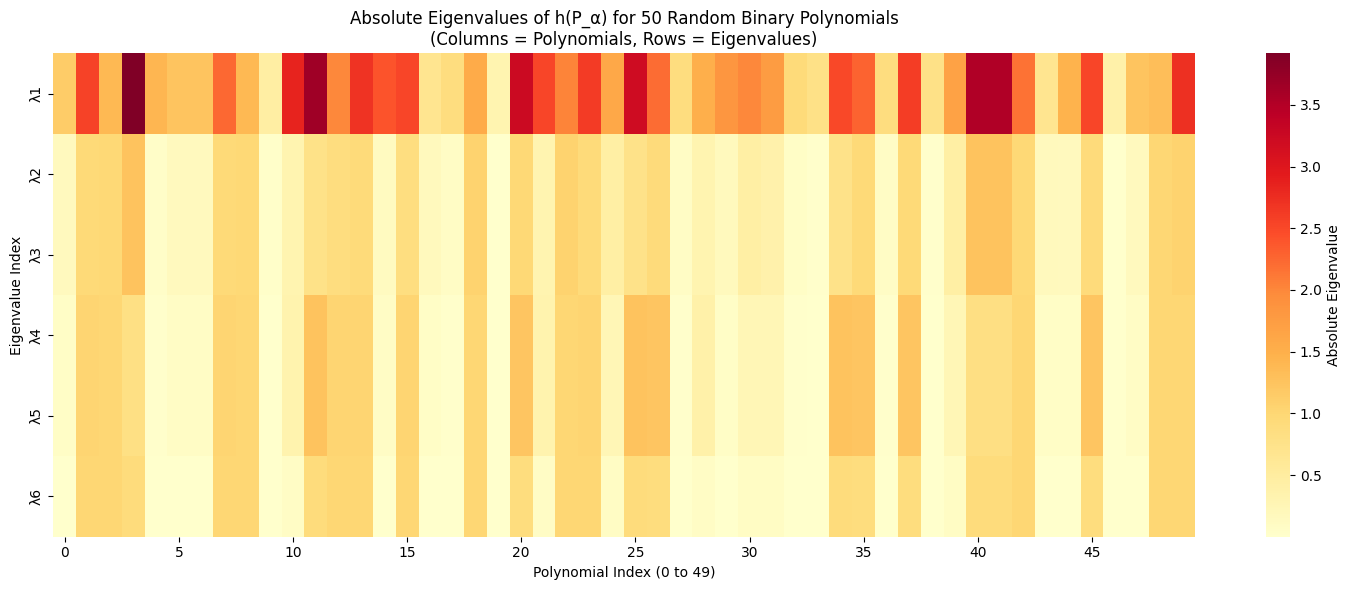

In [29]:


# 4. Plot heatmap of absolute eigenvalues
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(
    abs_eigenvalues_matrix,
    cmap="YlOrRd",  # Yellow-Orange-Red color scale
    annot=False,     # Don't show values in cells (too dense)
    cbar_kws={'label': 'Absolute Eigenvalue'},
    yticklabels=[f"λ{i+1}" for i in range(6)],  # Eigenvalue labels (λ1 to λ6)
    xticklabels=5    # Show x-axis label every 5 polynomials
)

plt.xlabel("Polynomial Index (0 to 49)")
plt.ylabel("Eigenvalue Index")
plt.title("Absolute Eigenvalues of h(P_α) for 50 Random Binary Polynomials\n(Columns = Polynomials, Rows = Eigenvalues)")
plt.tight_layout()

# Save high-resolution image
plt.savefig("eigenvalues_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

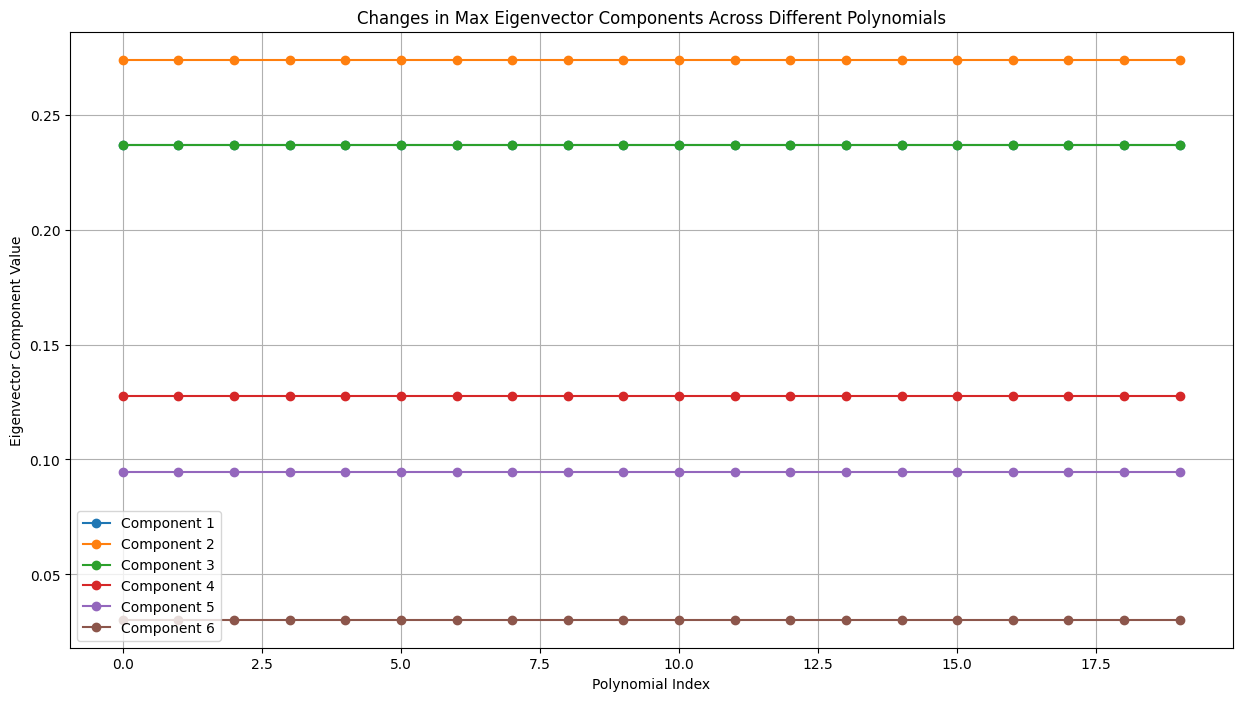

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig


# تابع محاسبه h(P_alpha)
def compute_hP(P, coeffs):
    n = P.shape[0]
    hP = np.zeros((n, n))
    for power, coeff in enumerate(coeffs):
        if coeff == 1:
            hP += np.linalg.matrix_power(P, power)
    return hP

# تولید 20 چندجمله‌ای تصادفی غیرثابت (برای نمونه)
n_degree = 6
num_polys = 20
polynomials = []
while len(polynomials) < num_polys:
    coeffs = np.random.randint(0, 2, size=n_degree+1)
    if sum(coeffs[1:]) > 0:
        polynomials.append(coeffs)

# محاسبه بردارهای ویژه ماکس
max_eigenvectors = []
for coeffs in polynomials:
    hP = compute_hP(P_alpha, coeffs)
    eigenvalues, eigenvectors = eig(hP)

    # یافتن بزرگترین مقدار ویژه (از نظر قدر مطلق)
    max_idx = np.argmax(np.abs(eigenvalues))
    max_vec = eigenvectors[:, max_idx].real

    # نرمال‌سازی به جمع 1
    max_vec = max_vec / np.sum(max_vec)
    max_eigenvectors.append(max_vec)

# تبدیل به آرایه numpy برای پردازش
max_eigenvectors = np.array(max_eigenvectors)

# رسم تغییرات بردارهای ویژه ماکس
plt.figure(figsize=(15, 8))

# رسم هر مؤلفه بردار ویژه به صورت جداگانه
for i in range(max_eigenvectors.shape[1]):
    plt.plot(max_eigenvectors[:, i], 'o-', label=f'Component {i+1}')

plt.xlabel('Polynomial Index')
plt.ylabel('Eigenvector Component Value')
plt.title('Changes in Max Eigenvector Components Across Different Polynomials')
plt.legend()
plt.grid()
plt.show()

Original λ_max: 0.825562

Results for first 5 polynomials:

Polynomial 1: [1 1 0 1]
New λ_max: 2.388225
Changed? ✅

Polynomial 2: [0 0 1 0]
New λ_max: 0.681552
Changed? ✅

Polynomial 3: [1 1 0 0]
New λ_max: 1.825562
Changed? ✅

Polynomial 4: [0 1 0 1]
New λ_max: 1.388225
Changed? ✅

Polynomial 5: [1 1 0 0]
New λ_max: 1.825562
Changed? ✅

Number of polynomials that changed λ_max: 47 out of 50


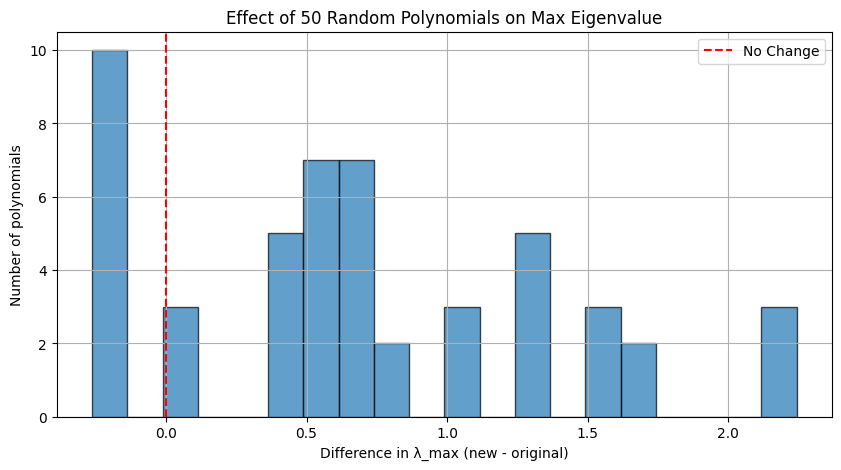

In [51]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt



# 1. Compute original max eigenvalue (λ_max) of P_alpha
eigenvalues_P, _ = eig(P_alpha)
lambda_max_original = np.max(np.abs(eigenvalues_P))

# 2. Function to generate random non-constant binary polynomials
def generate_polynomials(n_degree=3, num_polys=50):
    """
    Generate random binary polynomials with coefficients [0,1]
    Args:
        n_degree: Degree of polynomials
        num_polys: Number of polynomials to generate
    Returns:
        List of coefficient arrays
    """
    polynomials = []
    while len(polynomials) < num_polys:
        # Generate random coefficients [c0, c1, c2, c3] for polynomial
        coeffs = np.random.randint(0, 2, size=n_degree+1)
        # Ensure polynomial is non-constant (has at least one x^k term where k >= 1)
        if sum(coeffs[1:]) > 0:
            polynomials.append(coeffs)
    return polynomials

# Generate 50 random polynomials
polynomials = generate_polynomials()

# 3. Analyze each polynomial's effect on eigenvalues
results = []
for i, coeffs in enumerate(polynomials):
    # Compute h(P_alpha) = c0*I + c1*P + c2*P^2 + c3*P^3
    hP = np.zeros_like(P_alpha)
    for power, coeff in enumerate(coeffs):
        if coeff == 1:
            hP += np.linalg.matrix_power(P_alpha, power)

    # Compute eigenvalues of h(P_alpha)
    eigenvalues_hP, _ = eig(hP)
    lambda_max_hP = np.max(np.abs(eigenvalues_hP))

    # Check if max eigenvalue changed significantly
    is_changed = not np.isclose(lambda_max_hP, lambda_max_original, atol=1e-6)

    results.append({
        'polynomial': coeffs,
        'lambda_max_original': lambda_max_original,
        'lambda_max_hP': lambda_max_hP,
        'is_changed': is_changed
    })

# 4. Display results for first 5 polynomials
print(f"Original λ_max: {lambda_max_original:.6f}\n")
print("Results for first 5 polynomials:")
for i, res in enumerate(results[:5]):
    print(f"\nPolynomial {i+1}: {res['polynomial']}")
    print(f"New λ_max: {res['lambda_max_hP']:.6f}")
    print(f"Changed? {'✅' if res['is_changed'] else '❌'}")

# 5. Overall statistics
num_changed = sum(1 for res in results if res['is_changed'])
print(f"\nNumber of polynomials that changed λ_max: {num_changed} out of 50")

# 6. Plot histogram of changes
diffs = [res['lambda_max_hP'] - res['lambda_max_original'] for res in results]
plt.figure(figsize=(10, 5))
plt.hist(diffs, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(0, color='r', linestyle='--', label='No Change')
plt.xlabel('Difference in λ_max (new - original)')
plt.ylabel('Number of polynomials')
plt.title('Effect of 50 Random Polynomials on Max Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()